In [94]:
# Importing the libraries
import pandas as pd
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt
import matplotlib
import seaborn as sns

In [163]:
# Importing the tips dataset from the local file
df = pd.read_csv("diamonds_V6.csv")
df.head()

,price,carat,total_depth_%,table,length,width,depth,cut,color,clarity,color_mod,clarity_mod,Unnamed: 12,Unnamed: 13,Unnamed: 14
0,367,0.20,61.5,57.0,3.81,3.77,2.33,Ideal,D,VS2,1,5,ok,no,ok
1,367,0.20,59.7,55.0,3.86,3.84,2.30,Ideal,E,VS2,2,5,ok,no,ok
2,340,0.23,62.8,56.0,3.93,3.90,2.46,Ideal,J,VS1,7,4,ok,no,ok
3,404,0.23,61.9,54.0,3.93,3.95,2.44,Ideal,G,VS1,4,4,ok,no,ok
4,2757,0.70,62.5,57.0,5.70,5.72,3.57,Ideal,E,SI1,2,6,no,ok,ok


In [164]:
df['price'].describe()

count    10000.00000
mean      5251.86890
std       4400.31301
min        340.00000
25%       1822.00000
50%       3796.50000
75%       7465.25000
max      18806.00000
Name: price, dtype: float64

Here's a quick breakdown of the above as it relates to this particular dataset:

count: there are 244 rows in the dataset. mean: the average bill. std: the standard deviation. Standard Deviation tells how measurements for a group are spread out from the average (mean), or expected value. A low standard deviation means that most of the numbers are close to the average. A high standard deviation means that the numbers are more spread out. In our case the measurememnts of a total bill are spread of 8.9 to the left and to the right from the average bill (mean). min: the smallest bill in the dataset = 3.07 USD 25%: the 25th percentile. 25% of all bills are lower than 13.35 USD. 50%: the 50th percentile, or the median. 50% of bills are lower than 13.80 USD. 75%: the 75th percentile. 75% of bills are lower than 24.13 USD. max: the highest bill = 50.81 USD.

Also we can visually represent the distribution of the total bills using a histogram.

Histogram shows frequency distribution for a particular column in a dataset. For instance, if we want to see how many times the amount of total_bill is between 10-20, 20-30, 30-40 and so on, we can use a histogram.

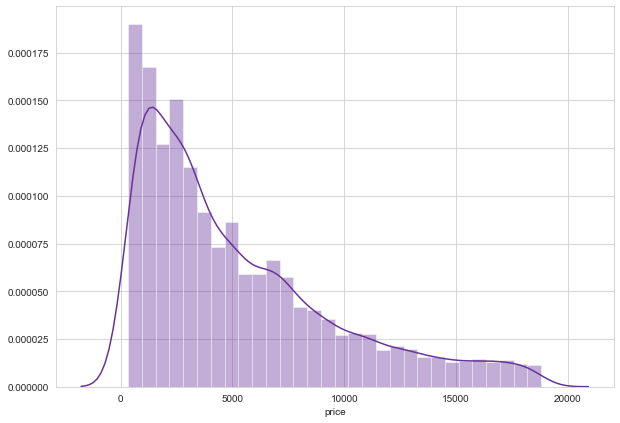

In [167]:
sns.set_style("whitegrid")
fig = plt.figure(figsize=(10,7))
sns.distplot(df['price'], color="rebeccapurple", bins = 30)

Looks like gamma distribution.

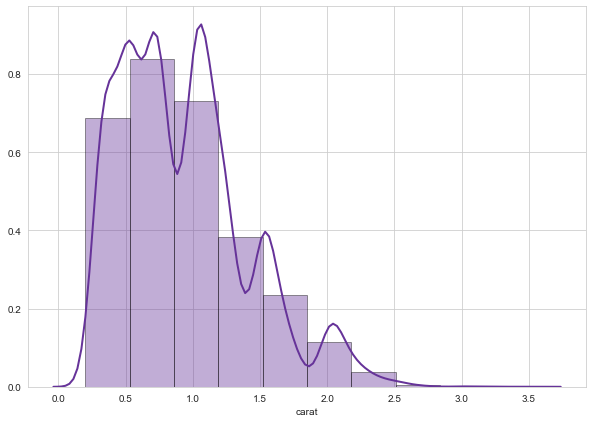

In [171]:
sns.set_style("whitegrid")
fig = plt.figure(figsize=(10,7))
sns.distplot(df['carat'], color="rebeccapurple", bins = 10,
             hist_kws={'edgecolor':'black'},
             kde_kws={'linewidth': 2})

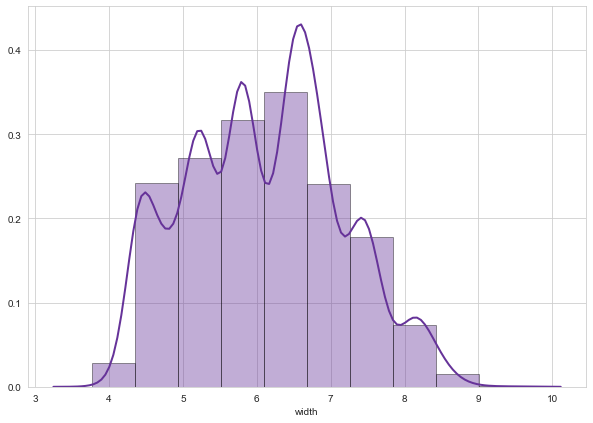

In [172]:
sns.set_style("whitegrid")
fig = plt.figure(figsize=(10,7))
sns.distplot(df['width'], color="rebeccapurple",bins = 10,
             hist_kws={'edgecolor':'black'},
             kde_kws={'linewidth': 2})

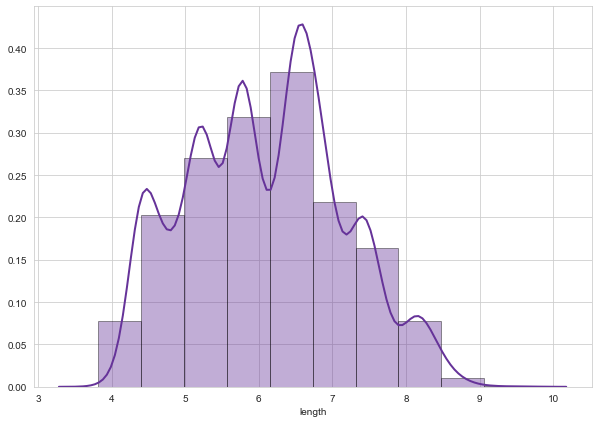

In [173]:
sns.set_style("whitegrid")
fig = plt.figure(figsize=(10,7))
sns.distplot(df['length'], color="rebeccapurple",bins = 10,
             hist_kws={'edgecolor':'black'},
             kde_kws={'linewidth': 2})

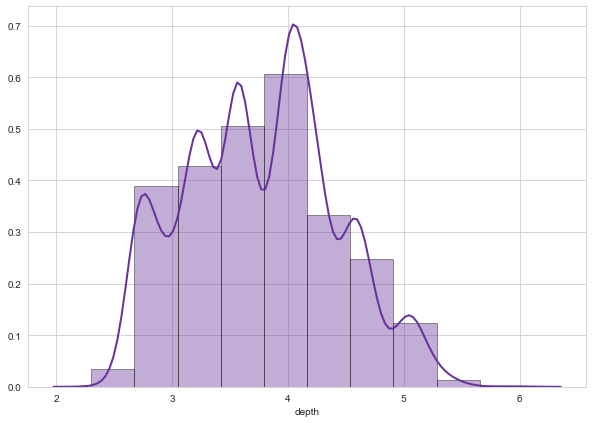

In [174]:
sns.set_style("whitegrid")
fig = plt.figure(figsize=(10,7))
sns.distplot(df['depth'], color="rebeccapurple",bins = 10,
             hist_kws={'edgecolor':'black'},
             kde_kws={'linewidth': 2})

Looks like lognormal distribution.

In [19]:
df['width'].describe()

count    48703.000000
mean         5.526410
std          0.944412
min          3.680000
25%          4.655000
50%          5.440000
75%          6.370000
max          9.130000
Name: width, dtype: float64

In [20]:
df['depth'].describe()

count    48703.000000
mean         3.412032
std          0.590573
min          1.070000
25%          2.860000
50%          3.350000
75%          3.950000
max          5.980000
Name: depth, dtype: float64

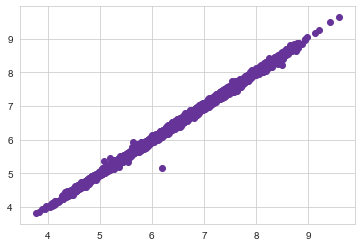

In [155]:
plt.scatter(df['width'], df['length'], color="rebeccapurple")

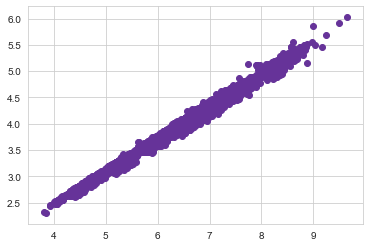

In [143]:
plt.scatter(df['length'], df['depth'], color="rebeccapurple")

In [ ]:
plt.scatter(df['width'], df['depth'], color="rebeccapurple")

In [ ]:
plt.scatter(df['width'], df['depth'], color="rebeccapurple")

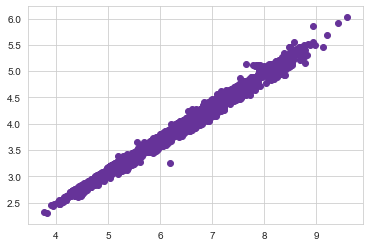

In [144]:
plt.scatter(df['width'], df['depth'], color="rebeccapurple")

In [71]:
w = df['width']
d = df['depth']

In [17]:
w_avg = np.mean(w)
d_avg = np.mean(d)

In [21]:
d_avg

3.4120321130115303

In [23]:
w_zero = w - w_avg
d_zero = d - d_avg

In [26]:
m = np.sum(w_zero * d_zero) / np.sum(w_zero * w_zero)

In [27]:
m

0.6178921191584842

In [28]:
c = d_avg - m * w_avg

In [29]:
c

-0.0026933747956836562

Finding the best fir line (calculating slope (m) and y intercept (c))

In [30]:
# Calculate the best values for m and c.

# First calculate the means of w and d.
w_avg = np.mean(w)
d_avg = np.mean(d)

# Subtract means from w and d.
w_zero = w - w_avg
d_zero = d - d_avg

# The best m is found by the following calculation.
m = np.sum(w_zero * d_zero) / np.sum(w_zero * w_zero)
# Use m from above to calculate the best c.
c = d_avg - m * w_avg

print("m is %8.6f and c is %6.6f." % (m, c))

m is 0.617892 and c is -0.002693.


In [31]:
np.polyfit(w, d, 1)

array([ 0.61789212, -0.00269337])

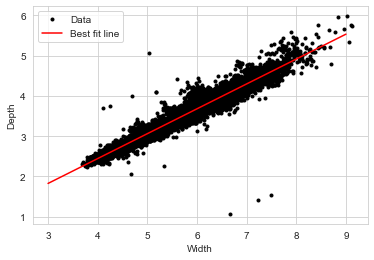

In [41]:
# Plot w versus d with black dots.
plt.plot(w, d, 'k.', label="Data")

# Overlay some lines on the plot.
x = np.arange(3.0, 9.5, 1.0)
plt.plot(x, 0.618 * x - 0.0269, 'r-', label=r"Best fit line")


# Add a legend.
plt.legend()

# Add axis labels.
plt.xlabel('Width')
plt.ylabel('Depth')

# Show the plot.
plt.show()

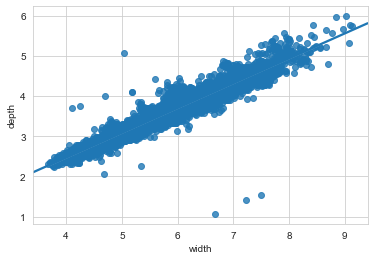

In [37]:
sns.regplot(x="width", y="depth", data=df)

In [3]:
df['width'].describe()

count    48703.000000
mean         5.526410
std          0.944412
min          3.680000
25%          4.655000
50%          5.440000
75%          6.370000
max          9.130000
Name: width, dtype: float64

In [ ]:
num_samples = 48703
desired_mean = 5.526410
desired_std_dev = 0.944412

samples = np.random.normal(loc=0.0, scale=desired_std_dev, size=num_samples)

actual_mean = np.mean(samples)
actual_std = np.std(samples)
print("Initial samples stats   : mean = {:.4f} stdv = {:.4f}".format(actual_mean, actual_std))

zero_mean_samples = samples - (actual_mean)

zero_mean_mean = np.mean(zero_mean_samples)
zero_mean_std = np.std(zero_mean_samples)
print("True zero samples stats : mean = {:.4f} stdv = {:.4f}".format(zero_mean_mean, zero_mean_std))

scaled_samples = zero_mean_samples * (desired_std_dev/zero_mean_std)
scaled_mean = np.mean(scaled_samples)
scaled_std = np.std(scaled_samples)
print("Scaled samples stats    : mean = {:.4f} stdv = {:.4f}".format(scaled_mean, scaled_std))

final_samples = scaled_samples + desired_mean
final_mean = np.mean(final_samples)
final_std = np.std(final_samples)
print("Final samples stats     : mean = {:.4f} stdv = {:.4f}".format(final_mean, final_std))